In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [57]:
# Charger les données depuis le fichier CSV
data = pd.read_csv("data.csv")

In [58]:
data

,Age,Nationalité,Sexe,Lieu de résidence,Problème général,Sous-problème spécifique
0,19,Maroc,Homme,Agadir,Transport,Conditions de sécurité insuffisantes dans les ...
1,64,Égypte,Homme,Marrakech,Santé,Manque de médicaments essentiels
2,64,Tunisie,Homme,Marrakech,Logistique,Absence de signalisation adéquate pour les tou...
3,42,Libye,Homme,Agadir,Logistique,Difficultés liées au transport des bagages
4,22,Mali,Homme,Agadir,Santé,Autre
...,...,...,...,...,...,...
99995,40,Libye,Homme,Rabat,Transport,Conditions de sécurité insuffisantes dans les ...
99996,24,Tunisie,Homme,Autre,Communication,Autre
99997,37,Djibouti,Homme,Casablanca,Logistique,Absence de signalisation adéquate pour les tou...
99998,61,Tunisie,Femme,Fes,Hébergement,Manque d'accessibilité pour les personnes hand...


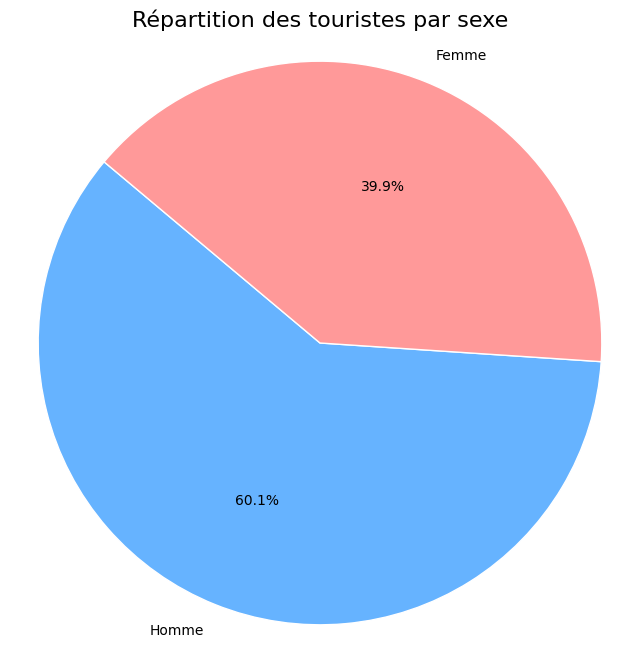

In [59]:
import matplotlib.pyplot as plt

# Répartition des touristes par sexe
sex_counts = data['Sexe'].value_counts()

# Couleurs personnalisées pour les tranches du pie chart
colors = ['#66b3ff' ,'#ff9999']

# Création du pie chart avec des options de personnalisation
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})

# Ajout de titre et suppression du label y
plt.title('Répartition des touristes par sexe', fontsize=16)
plt.ylabel('')

# Affichage du graphique
plt.axis('equal')  # Pour s'assurer que le pie chart est un cercle
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9084\1507502418.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_nationality = data.groupby(['Nationalité', pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])]).size().unstack(fill_value=0)


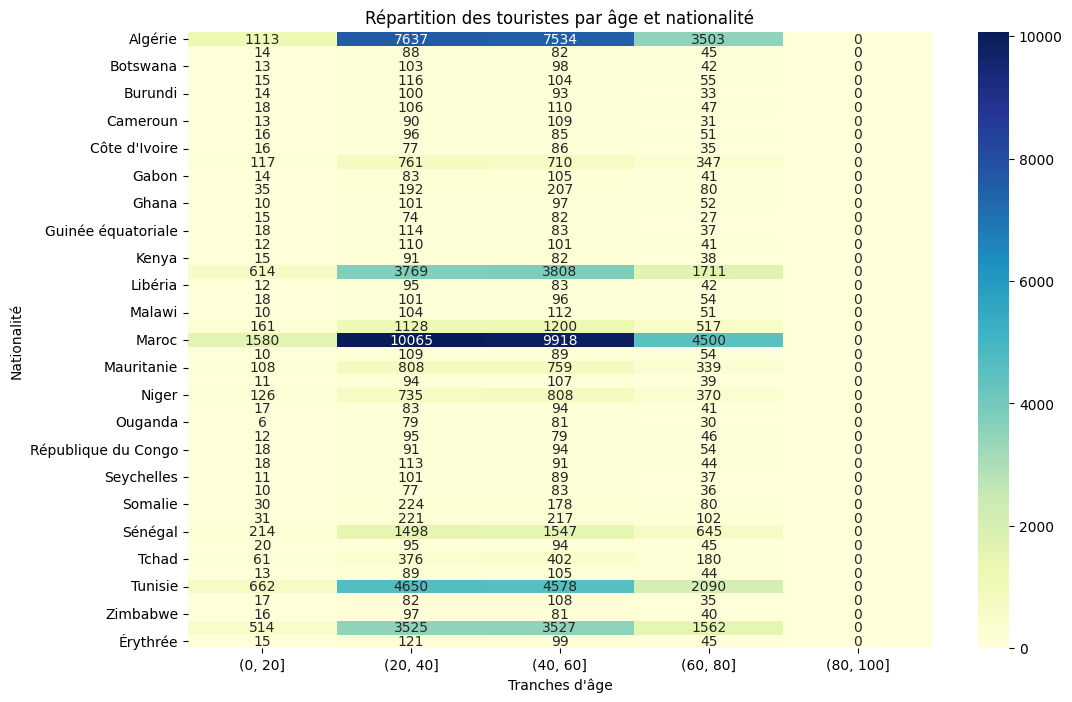

In [60]:

# Comparaison entre les différents groupes démographiques pour identifier les tendances
age_nationality = data.groupby(['Nationalité', pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(age_nationality, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Répartition des touristes par âge et nationalité')
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nationalité')
plt.show()


In [61]:
import pandas as pd

# Charger les données depuis le fichier CSV
df = pd.read_csv("data.csv")

# Compter le nombre d'occurrences de chaque problème général
problemes_frequents = df['Problème général'].value_counts()

print("Problèmes généraux les plus fréquents :")
print(problemes_frequents)


Problèmes généraux les plus fréquents :
Problème général
Santé            35204
Transport        24861
Hébergement      20036
Logistique        9996
Communication     9903
Name: count, dtype: int64


In [62]:
# Groupement par problème général et comptage des occurrences de chaque sous-problème
sous_problemes_frequents = df.groupby('Problème général')['Sous-problème spécifique'].value_counts()

print("Sous-problèmes spécifiques pour chaque problème général :")
print(sous_problemes_frequents)


Sous-problèmes spécifiques pour chaque problème général :
Problème général  Sous-problème spécifique                                          
Communication     Manque de connexions internet fiables dans certaines régions          2556
                  Autre                                                                 2491
                  Difficultés de communication avec les services d'urgence              2429
                  Problèmes de traduction dans les documents officiels                  2427
Hébergement       Services clientèle médiocres dans les établissements d'hébergement    5097
                  Problèmes d'hygiène et de propreté dans les logements                 5032
                  Autre                                                                 4965
                  Manque d'accessibilité pour les personnes handicapées                 4942
Logistique        Difficultés liées au transport des bagages                            2626
                  Ma

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9084\2330413003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Problème général', data=df, order=df['Problème général'].value_counts().index, palette='viridis')
c:\Users\Lenovo\Desktop\pandas\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lenovo\Desktop\pandas\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\

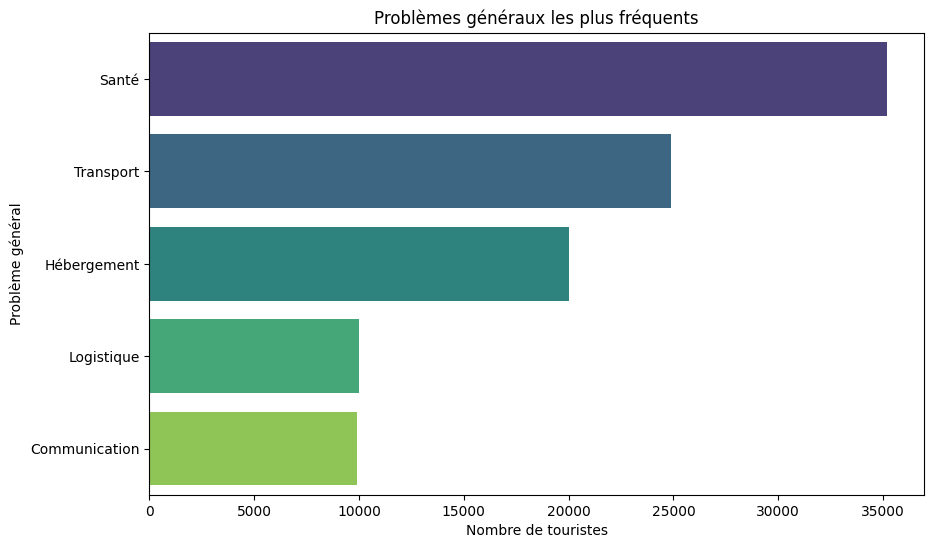

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un diagramme à barres pour les problèmes généraux les plus fréquents
plt.figure(figsize=(10, 6))
sns.countplot(y='Problème général', data=df, order=df['Problème général'].value_counts().index, palette='viridis')
plt.title('Problèmes généraux les plus fréquents')
plt.xlabel('Nombre de touristes')
plt.ylabel('Problème général')
plt.show()


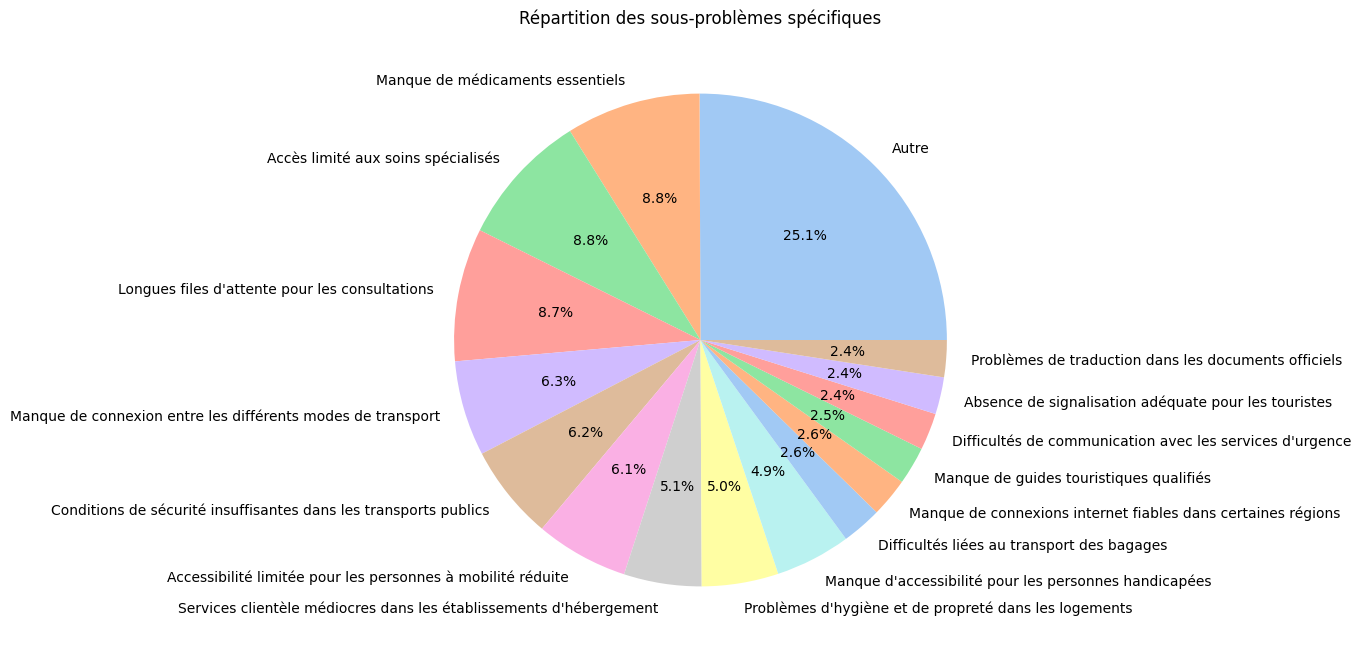

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
# Créer le diagramme circulaire
df['Sous-problème spécifique'].value_counts().plot.pie(autopct='%1.1f%%',  colors=sns.color_palette('pastel'))



plt.title('Répartition des sous-problèmes spécifiques')
plt.ylabel('')
plt.show()


In [65]:
import pandas as pd
from geopy.geocoders import Nominatim

# Charger les données depuis le fichier CSV
df = pd.read_csv("data.csv")

# Créer un géocodeur avec Nominatim
geolocator = Nominatim(user_agent="analyse_problemes_touristes")

# Fonction pour géocoder les villes et obtenir leurs coordonnées de latitude et longitude
def geocoder_ville(ville):
    location = geolocator.geocode(ville)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None



In [66]:

# Appliquer la fonction de géocodage pour chaque ville dans le DataFrame
df['Latitude'], df['Longitude'] = zip(*df['Lieu de résidence'].apply(geocoder_ville))

# Supprimer les lignes avec des valeurs manquantes pour la latitude et la longitude
df = df.dropna(subset=

# Enregistrer les données mises à jour dans un nouveau fichier CSV
df.to_csv("data_geocoded.csv", index=False)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Casablanca&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [67]:
import folium
from folium.plugins import HeatMap

# Coordonnées de Agadir et Casablanca
coords_agadir = [30.427755, -9.598107]
coords_casablanca = [33.5731104, -7.5898434]

# Créer une carte centrée sur Agadir
map_heat = folium.Map(location=coords_agadir, zoom_start=10)

# Ajouter un marqueur pour Agadir
folium.Marker(coords_agadir, popup='Agadir').add_to(map_heat)

# Ajouter un marqueur pour Casablanca
folium.Marker(coords_casablanca, popup='Casablanca').add_to(map_heat)

# Créer des données pour la carte thermique (heatmap)
data_heatmap = [coords_agadir, coords_casablanca]

# Ajouter la heatmap à la carte
HeatMap(data_heatmap).add_to(map_heat)

# Enregistrer la carte au format HTML
map_heat.save('heatmap_villes.html')

# Afficher la carte
map_heat


In [72]:
coords = {
    "Agadir": [30.427755, -9.598107],
    "Casablanca": [33.5731104, -7.5898434],
    "Fes": [34.0331300, -5.0002800],
    "Rabat": [34.020882, -6.841650],
    "Tanger": [35.759465, -5.833954],
    "Marrakech": [31.6341600, -7.9999400]
    "Autre" : [None,None]
}
data['Latitude'] = data["Lieu de résidence"].map(lambda x: coords[x][0])
data['Longitude'] = data["Lieu de résidence"].map(lambda x: coords[x][1])


KeyError: 'Autre'

In [69]:
data['Lieu de résidence'].value_counts()

Lieu de résidence
Casablanca    14360
Autre         14347
Fes           14316
Marrakech     14301
Tanger        14296
Rabat         14207
Agadir        14173
Name: count, dtype: int64